In [1]:
import pandas as pd

DATA_PATH = "/Users/trentonwirth/GitHub/neuromatch-group-project-summer-2024/data/subject_11_data_simulated_k_is_030.csv"

df = pd.read_csv(DATA_PATH)

print(df.head())

   trial_index  trial_time  response_arrow_start_angle  motion_direction  \
0            1    0.000000                       226.0               225   
1            2    3.586547                       281.0               225   
2            3    6.930721                        99.0               235   
3            4   10.794110                        71.0               225   
4            5   14.457874                        73.0               245   

   motion_coherence  estimate_x  estimate_y  reaction_time  raw_response_time  \
0              0.12   -1.264144   -2.156836       2.047948           3.356679   
1              0.24   -1.432605   -2.048815       1.826069           6.708648   
2              0.24   -0.066772   -2.499108       2.338644          10.565380   
3              0.12   -1.137159   -2.226403       2.138492          14.228647   
4              0.24   -1.236365   -2.172879       2.675197          18.429143   

   prior_std  ...  subject_id          experiment_name e

In [2]:
mean_simulation_error = df.groupby('motion_coherence')['simulation_error'].mean()
print(mean_simulation_error)

motion_coherence
0.06    61.001870
0.12    56.815462
0.24    41.397523
Name: simulation_error, dtype: float64


In [3]:
import numpy as np

def circular_error(estimate_angle, percept_decision):
    error = np.abs((estimate_angle - percept_decision + 180) % 360 - 180)
    return error

In [4]:
df['simulation_error_from_motion_direction'] = circular_error(df['percept_decision'], df['motion_direction'])

In [5]:
mean_simulation_error_motion_direction = df.groupby('motion_coherence')['simulation_error_from_motion_direction'].mean()
print(mean_simulation_error_motion_direction)

motion_coherence
0.06    51.047302
0.12    44.989723
0.24    33.857274
Name: simulation_error_from_motion_direction, dtype: float64


In [6]:
mean_absolute_error_stimulus = df.groupby('motion_coherence')['absolute_angular_error_stimulus'].mean()
print(mean_absolute_error_stimulus)

motion_coherence
0.06    38.384450
0.12    24.556671
0.24    11.628439
Name: absolute_angular_error_stimulus, dtype: float64


In [7]:
df.keys()

Index(['trial_index', 'trial_time', 'response_arrow_start_angle',
       'motion_direction', 'motion_coherence', 'estimate_x', 'estimate_y',
       'reaction_time', 'raw_response_time', 'prior_std', 'prior_mean',
       'subject_id', 'experiment_name', 'experiment_id', 'session_id',
       'run_id', 'estimate_angle', 'absolute_angular_error_stimulus',
       'absolute_angular_error_prior_mean', 'percept_decision',
       'simulation_error', 'simulation_error_from_motion_direction'],
      dtype='object')

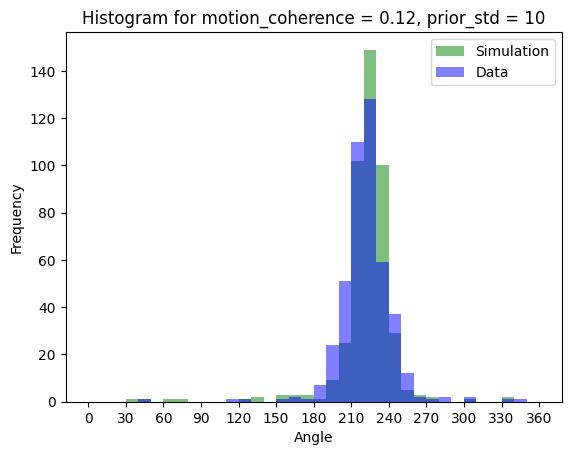

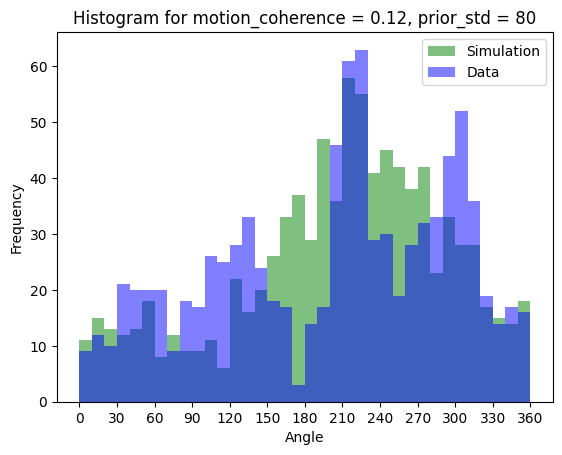

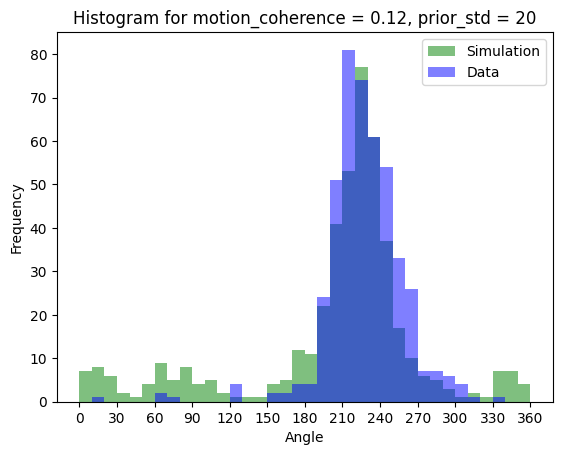

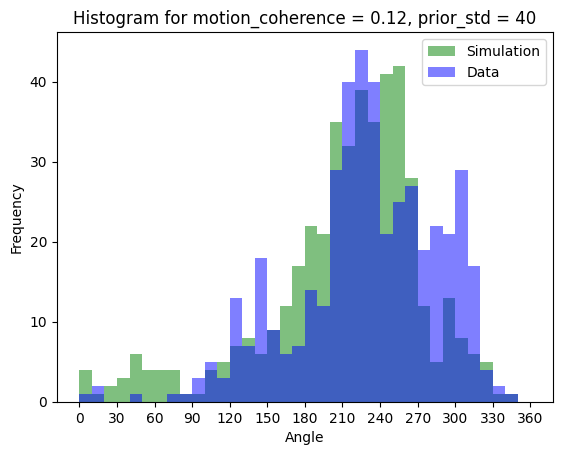

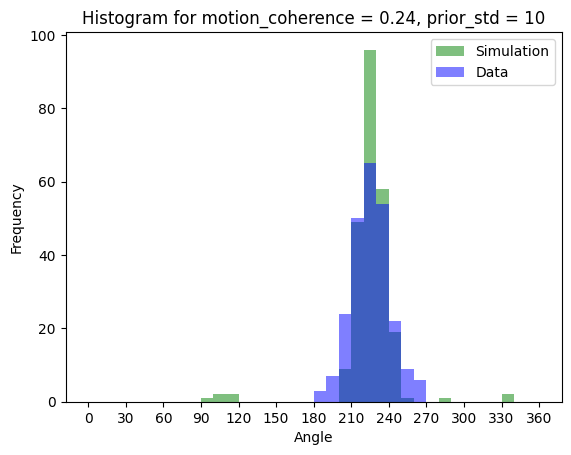

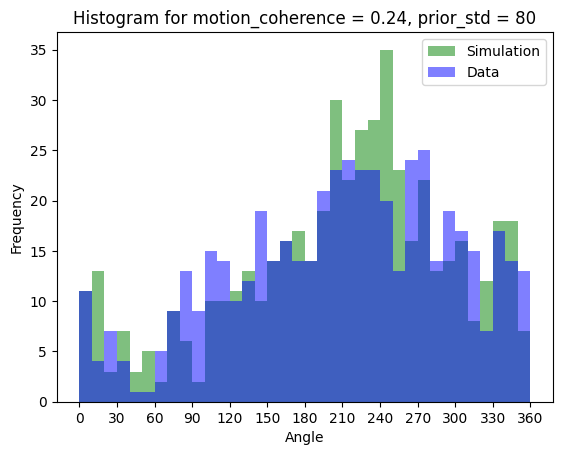

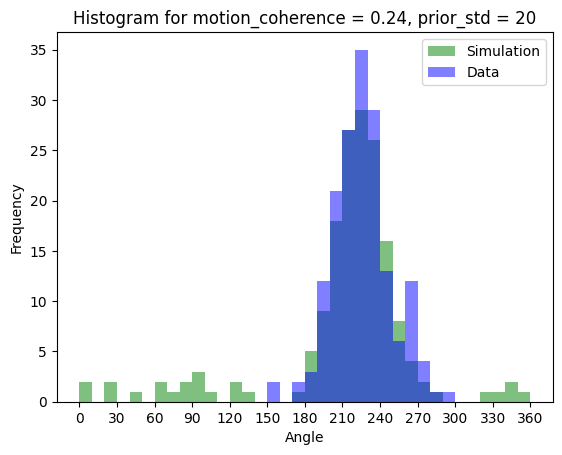

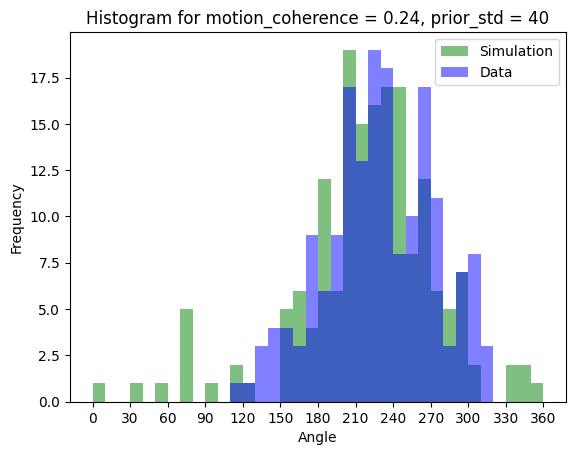

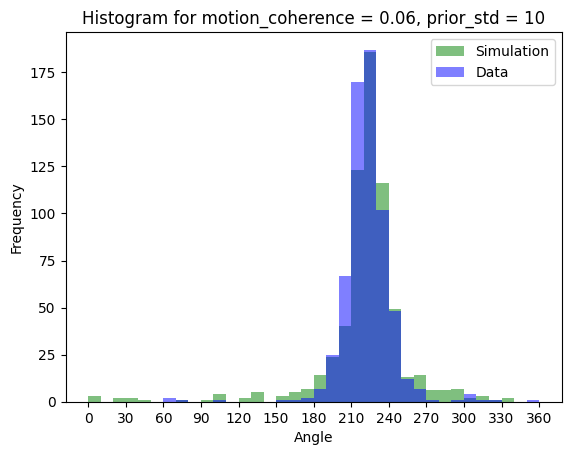

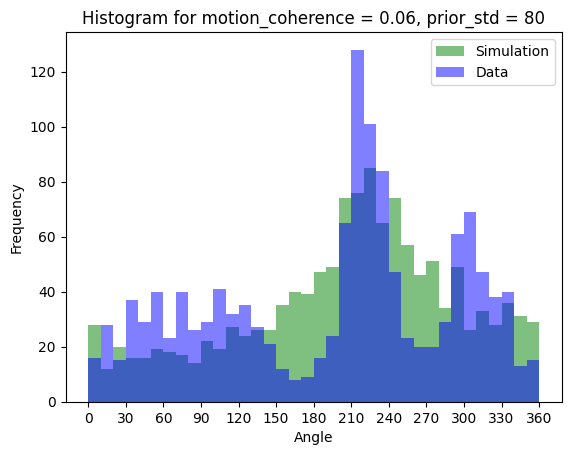

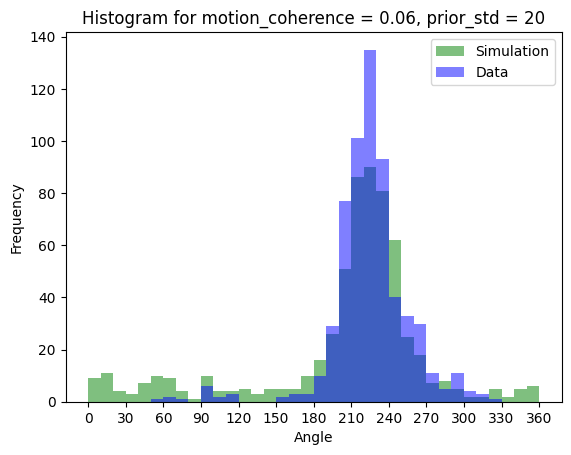

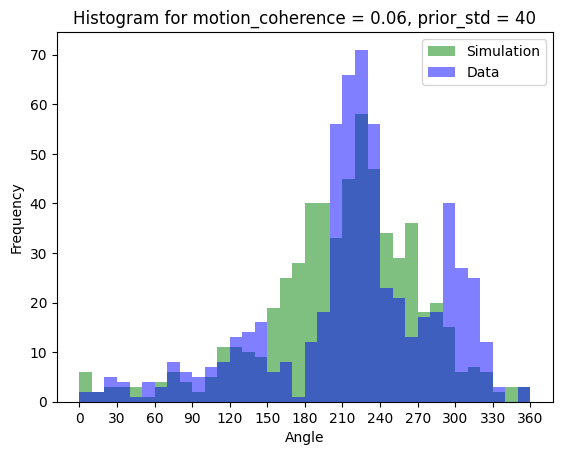

In [8]:
import matplotlib.pyplot as plt

# Set the x-axis range
x_range = range(0, 361)

# Get unique levels of motion_coherence
motion_coherence_levels = df['motion_coherence'].unique()

# Get unique values of prior_std
prior_std_values = df['prior_std'].unique()

# Create a subplot for each level of motion_coherence and prior_std
for level in motion_coherence_levels:
    for std in prior_std_values:
        # Filter the dataframe for the current level of motion_coherence and prior_std
        filtered_df = df[(df['motion_coherence'] == level) & (df['prior_std'] == std)]
        
        # Set the bin width to 10 degrees
        bins = range(0, 361, 10)
        
        # Plot the histogram for percept_direction
        plt.hist(filtered_df['percept_decision'], bins=bins, color='green', alpha=0.5, label='Simulation')
        
        # Plot the histogram for estimate_angle
        plt.hist(filtered_df['estimate_angle'], bins=bins, color='blue', alpha=0.5, label='Data')
        
        # Set the title and labels
        plt.title(f'Histogram for motion_coherence = {level}, prior_std = {std}')
        plt.xlabel('Angle')
        plt.ylabel('Frequency')
        
        # Set the x-axis ticks as multiples of 30
        plt.xticks(range(0, 361, 30))
        
        # Add a legend
        plt.legend()
        
        # Show the plot
        plt.show()

In [9]:
# Initialize an empty DataFrame to store the histogram data
hist_df = pd.DataFrame(columns=['motion_coherence', 'prior_std', 'angle', 'frequency', 'type'])

# Set the bin edges
bins = np.arange(0, 361, 10)

# Get unique levels of motion_coherence and prior_std
motion_coherence_levels = df['motion_coherence'].unique()
prior_std_values = df['prior_std'].unique()

# Loop through each combination of motion_coherence and prior_std
for level in motion_coherence_levels:
	for std in prior_std_values:
		# Filter the DataFrame for the current level of motion_coherence and prior_std
		filtered_df = df[(df['motion_coherence'] == level) & (df['prior_std'] == std)]
		
		# Calculate histogram for percept_decision
		percept_hist, _ = np.histogram(filtered_df['percept_decision'], bins=bins)
		
		# Calculate histogram for estimate_angle
		estimate_hist, _ = np.histogram(filtered_df['estimate_angle'], bins=bins)
		
		# Create a DataFrame for percept_decision
		percept_df = pd.DataFrame({
			'motion_coherence': level,
			'prior_std': std,
			'angle': bins[:-1],
			'frequency': percept_hist,
			'type': 'percept_decision'
		})
		
		# Create a DataFrame for estimate_angle
		estimate_df = pd.DataFrame({
			'motion_coherence': level,
			'prior_std': std,
			'angle': bins[:-1],
			'frequency': estimate_hist,
			'type': 'estimate_angle'
		})
		
		# Append the data to hist_df
		hist_df = pd.concat([hist_df, percept_df, estimate_df], ignore_index=True)

# Display the hist_df
print(hist_df)

     motion_coherence prior_std angle frequency              type
0                0.12        10     0         0  percept_decision
1                0.12        10    10         0  percept_decision
2                0.12        10    20         0  percept_decision
3                0.12        10    30         1  percept_decision
4                0.12        10    40         1  percept_decision
..                ...       ...   ...       ...               ...
859              0.06        40   310        25    estimate_angle
860              0.06        40   320        12    estimate_angle
861              0.06        40   330         3    estimate_angle
862              0.06        40   340         0    estimate_angle
863              0.06        40   350         3    estimate_angle

[864 rows x 5 columns]


/var/folders/q4/sykfvr2x6c30q2z8_4prmbt40000gn/T/ipykernel_80630/1650465155.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hist_df = pd.concat([hist_df, percept_df, estimate_df], ignore_index=True)


In [10]:
import plotly.graph_objects as go
import pandas as pd

# Assuming hist_df is already defined earlier in the file

# Get unique levels of motion_coherence and prior_std
motion_coherence_levels = np.sort(hist_df['motion_coherence'].unique())
prior_std_values = np.sort(hist_df['prior_std'].unique())

# Loop through each combination of motion_coherence and prior_std
for level in motion_coherence_levels:
    for std in prior_std_values:
        # Filter the hist_df for the current level of motion_coherence and prior_std
        filtered_df = hist_df[(hist_df['motion_coherence'] == level) & (hist_df['prior_std'] == std)]
        
        # Create the figure
        fig = go.Figure()
        
        # Filter the filtered_df for percept_decision data
        percept_decision_df = filtered_df[filtered_df['type'] == 'percept_decision']
        
        # Add percept_decision data
        fig.add_trace(go.Scatterpolar(
            r=percept_decision_df['frequency'],
            theta=percept_decision_df['angle'],
            mode='lines',
            name='Simulation',
            line=dict(color='lightgreen')
        ))
        
        # Filter the filtered_df for estimate_angle data
        estimate_angle_df = filtered_df[filtered_df['type'] == 'estimate_angle']
        
        # Add estimate_angle data
        fig.add_trace(go.Scatterpolar(
            r=estimate_angle_df['frequency'],
            theta=estimate_angle_df['angle'],
            mode='lines',
            name='Data',
            line=dict(color='lightblue')
        ))
        
        # Update layout
        fig.update_layout(
            title=f'Polar Plot for motion_coherence = {level}, prior_std = {std}',
            polar=dict(
                bgcolor='rgba(0,0,0,0)',  # Transparent background
                # radialaxis=dict(visible=True, range=[0, hist_df['frequency'].max()]),
                # angularaxis=dict(direction='clockwise', rotation=90)  # 0 degrees at the top
            ),
            template='plotly_dark',
            showlegend=True
        )
        
        # Show the plot
        fig.show()

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Assuming hist_df is already defined earlier in the file

# Get unique levels of motion_coherence and prior_std
motion_coherence_levels = np.sort(hist_df['motion_coherence'].unique())
prior_std_values = np.sort(hist_df['prior_std'].unique())

# Loop through each prior_std value
for std in prior_std_values:
    # Create a subplot figure with 1 row and len(motion_coherence_levels) columns
    fig = make_subplots(rows=1, cols=len(motion_coherence_levels), 
                        subplot_titles=[f'motion_coherence = {level}' for level in motion_coherence_levels],
                        specs=[[{'type': 'polar'}] * len(motion_coherence_levels)])
    
    # Loop through each motion_coherence value
    for i, level in enumerate(motion_coherence_levels):
        # Filter the hist_df for the current level of motion_coherence and prior_std
        filtered_df = hist_df[(hist_df['motion_coherence'] == level) & (hist_df['prior_std'] == std)]
        
        # Filter the filtered_df for percept_decision data
        percept_decision_df = filtered_df[filtered_df['type'] == 'percept_decision']
        
        # Add percept_decision data
        fig.add_trace(go.Scatterpolar(
            r=percept_decision_df['frequency'],
            theta=percept_decision_df['angle'],
            mode='lines',
            name='Simulation',
            line=dict(color='forestgreen'),
            showlegend=(i == len(motion_coherence_levels) - 1)  # Show legend only for the last subplot
        ), row=1, col=i+1)
        
        # Filter the filtered_df for estimate_angle data
        estimate_angle_df = filtered_df[filtered_df['type'] == 'estimate_angle']
        
        # Add estimate_angle data
        fig.add_trace(go.Scatterpolar(
            r=estimate_angle_df['frequency'],
            theta=estimate_angle_df['angle'],
            mode='lines',
            name='Data',
            line=dict(color='cyan'),
            showlegend=(i == len(motion_coherence_levels) - 1)  # Show legend only for the last subplot
        ), row=1, col=i+1)
        
        # Update polar layout for each subplot
        fig.update_polars(
            angularaxis=dict(
                tickmode='array',
                tickvals=np.arange(0, 360, 30),  # Show ticks every 30 degrees
                rotation=225-270,  # 225 degrees pointed up
                direction='clockwise'
            ),
            radialaxis=dict(
                visible=True,
            ),
            bgcolor='rgba(0,0,0,0)'  # Transparent background
        )
    
    # Update layout
    fig.update_layout(
        title=f'Subject 11, Prior Block Standard Deviation = {std}',
        template='plotly_dark',
        showlegend=True
    )
    
    # Show the plot
    fig.show()